In [2]:
import csv

dat_folder = './'
#files = ['edge.log','cloud.log']
files = ['cloud.log']
header = ['time', 'latency', 'size']


for file in files:
    i = 0
    time = 0
    data = []
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            if '------' in l:
                with open(dat_folder + file.split('.')[0] + "_csv/" + "run_" + file.split('.')[0] + "_" + str(i), 'w', encoding='UTF8') as to_write:
                    writer = csv.writer(to_write)
                    writer.writerow(header)
                    for d in data:
                        writer.writerow(d)
                i = i + 1
                data = []
                time = 0
            else:
                x = l[:-2].split("(")[-1].split(",")
                lat, by = float(x[0]), float(x[1]) / 10**6
                data.append([time,lat,by])
                time = time + 10

In [3]:
import pandas as pd
import os 

scenarios = ['edge_csv/', 'cloud_csv/']

column_names = [
    "Time (sec)",
    "Latency (ms)",
    "Size (MB)"
]

usecols = [0,1,2]
dfs_dict = {}

for s in scenarios:
    dfs_list = []
    for file in os.listdir(dat_folder + s):
        if not os.path.isdir(dat_folder + s + file):
            df = pd.read_csv(
                dat_folder + s +file, 
                sep=',',
                usecols=usecols,
                names=column_names,
                skiprows=[0])
            dfs_list += [df]
    dfs_dict[s[:-1]] = dfs_list

In [4]:
dfs = {}
for s in scenarios:
    dfs_groupby = pd.concat(dfs_dict[s[:-1]]).groupby('Time (sec)')
    dfs[s[:-1]] = (dfs_groupby.mean(), dfs_groupby.std(), dfs_groupby.median(), dfs_groupby.max(), dfs_groupby.min())
dfs['cloud_csv'][3].reset_index()

,Time (sec),Latency (ms),Size (MB)
0,0,22923.076923,54.384615
1,10,22923.076923,54.384615
2,20,15731.818182,47.083333
3,30,15320.000000,39.012821
4,40,14547.619048,36.500000
...,...,...,...
115,1150,15563.333333,57.714286
116,1160,18581.818182,59.681818
117,1170,22120.833333,54.384615
118,1180,22120.833333,54.107143


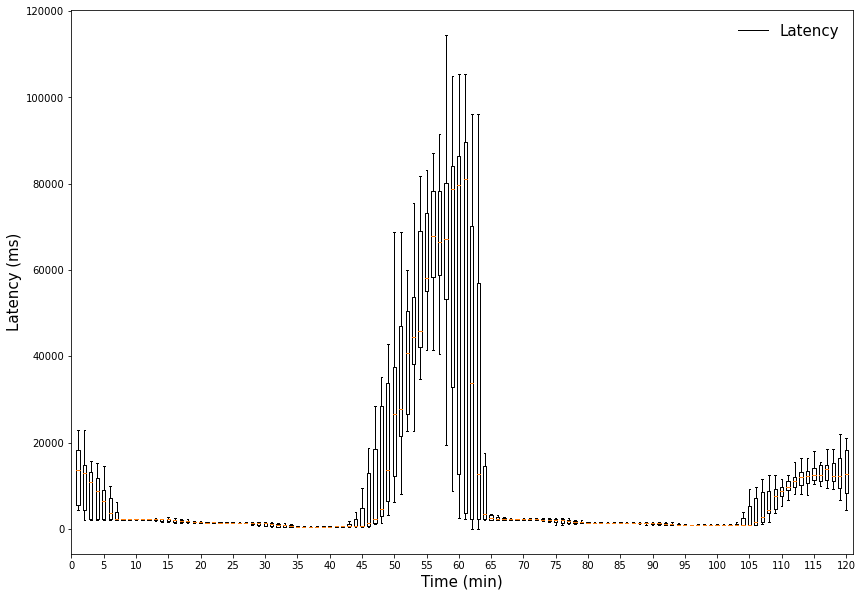

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


scenario = 'cloud_csv'    #rembember to change this
col = 'Latency (ms)'      #rembember to change this
save_label = 'cloud_size' #rembember to change this
legend = 'Latency'  #rembember to change this'
all_data = []
for i in range(120):
    data = []
    for df in dfs_dict[scenario]:
        data += [df[col][i]]
    all_data += [data]
fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
box = ax.boxplot(all_data,0,'')

ax.legend(box['boxes'], [legend], loc='upper right', ncol=1, frameon=False, prop={'size':15})
ax.set_xlim(0, 121)
ax.set_xticks(range(0,121,5))
ax.set_xticklabels([i * 5 for i in range(25)])
ax.set_xlabel('Time (min)')
ax.set_ylabel(col)
ax.xaxis.get_label().set_size(15)
ax.yaxis.get_label().set_size(15)
plt.show()

In [45]:
fig.savefig(f'./images/{save_label}.png', dpi=100)